## Importing Libraries To Perfome Data Analysis on Loan Default

In [136]:
# Importing OS to set root path to access dataset and save figures
import os
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
print(BASE_DIR)
data_path = os.path.join(BASE_DIR, 'data', 'Loan_default (1).csv')

c:\Users\Atul Goswami\Desktop\Data


In [137]:
# importing libraries to perform data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [138]:
# reading data from data/ directory
df = pd.read_csv(data_path)
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [139]:
# droping LoanID from dataset to start analysis
df.drop('LoanID', axis=1, inplace=True)

In [ ]:
# describe() is used to quickly summarize the key statistics of a dataset, Here it only summarize on Numerical columns
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [140]:
# describe() is used to quickly summarize the key statistics of a dataset, Here it only summarize on Categorical columns
df.describe(include=['object'])

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255347,255347,255347,255347,255347,255347,255347
unique,4,4,3,2,2,5,2
top,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,64366,64161,85302,127677,127742,51298,127701


#### Creating New column AgeGroup to have better visualisation on dataset

In [ ]:
age_bins = [18, 26, 36, 46, 56, 66, 120] 
age_labels = [ 
    "18-25 Young Adult", 
    "26-35 Early Career", 
    "36-45 Mid Career", 
    "46-55 Senior Career", 
    "56-65 Pre-Retirement", 
    "66+ Retirement" ]

df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=age_bins,
    labels=age_labels,
    right=False, 
    include_lowest=True
)

In [141]:
# Checking whether our Loan_default.csv dataset contains any NAN values or not?
df.isna().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [142]:
# info() is used to get a quick structural overview of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

## EDA

In [143]:
# Dividing dataset into two categories
categorical = df.select_dtypes(include='object').columns ## this gives columns with data type - object
numerical = df.select_dtypes(include=['int', 'float']).columns ## this gives columns with data type - float and int

In [9]:
# A few color palette for aesthetic plots
# Check out all of them by individually executing them. 
# Remember, aesthetics also add an interesting point for the flow of work.
mesh_1 = ['#AEFFBE','#94FFF1','#FFE48A','#FF9EBE']
sns.color_palette(mesh_1)
colors = ['#FF5851', '#F3C130', '#414A6B', '#B49A85', '#1C1B20']
sns.color_palette(colors)
colors_1 = ['#1D4851','#9AB5BC','#FF9001','#FF4701']
sns.color_palette(colors_1)
colors_2 = ['#0D110F','#6F8C64','#FDD584','#2A4731']
sns.color_palette(colors_2)
colors_3 = ['#0B0B11','#8288C3','#242961','#D0BED4']
sns.color_palette(colors_3)
colors_4 = ['#645CAA','#A084CA','#BFACE0','#EBC7E8']
sns.color_palette(colors_4)

[(0.39215686274509803, 0.3607843137254902, 0.6666666666666666),
 (0.6274509803921569, 0.5176470588235295, 0.792156862745098),
 (0.7490196078431373, 0.6745098039215687, 0.8784313725490196),
 (0.9215686274509803, 0.7803921568627451, 0.9098039215686274)]

In [ ]:
# for random Color palettes
import random
random_clr = list(sns.palettes.SEABORN_PALETTES.keys())


### EDA Save path

In [54]:
eda_path = os.path.join(BASE_DIR, 'figures')

In [91]:
def plot_data(column,clr):
    fig,axes = plt.subplots(1,3,figsize=(18,5))
    fig.suptitle(f"{column} Hist vs Distribution Vs Boxplot - 0: Non-Defaulter, 1: Defaulter", fontsize=20, fontstyle='oblique')
    sns.histplot(ax=axes[0], x=column, data=df, color=clr[1])
    axes[0].set_title(f'Histogram of {column}', fontsize=15)

    # Distribution (KDE)
    sns.kdeplot(ax=axes[1], x=df[column], color=clr[0], fill=True)
    axes[1].set_title(
        f'Distribution of {column}',
        fontstyle='italic',
        fontsize=15,
        color='black'
    )
    axes[1].set_xlabel(column)

    # Boxplot
    sns.boxplot(ax=axes[2], x=column, data=df, color=clr[3])

    plt.tight_layout()
    plt.savefig(f"{eda_path}/ {column} Hist vs Distribution Vs Boxplot.pdf")
    plt.show()

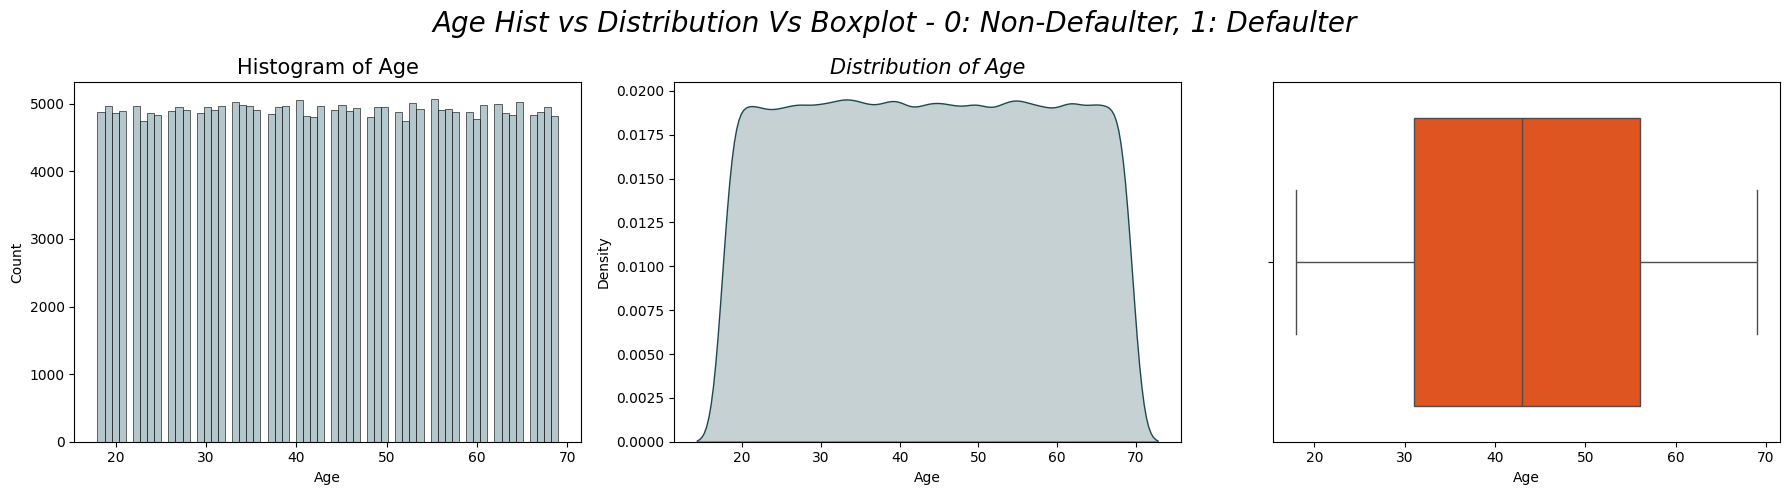

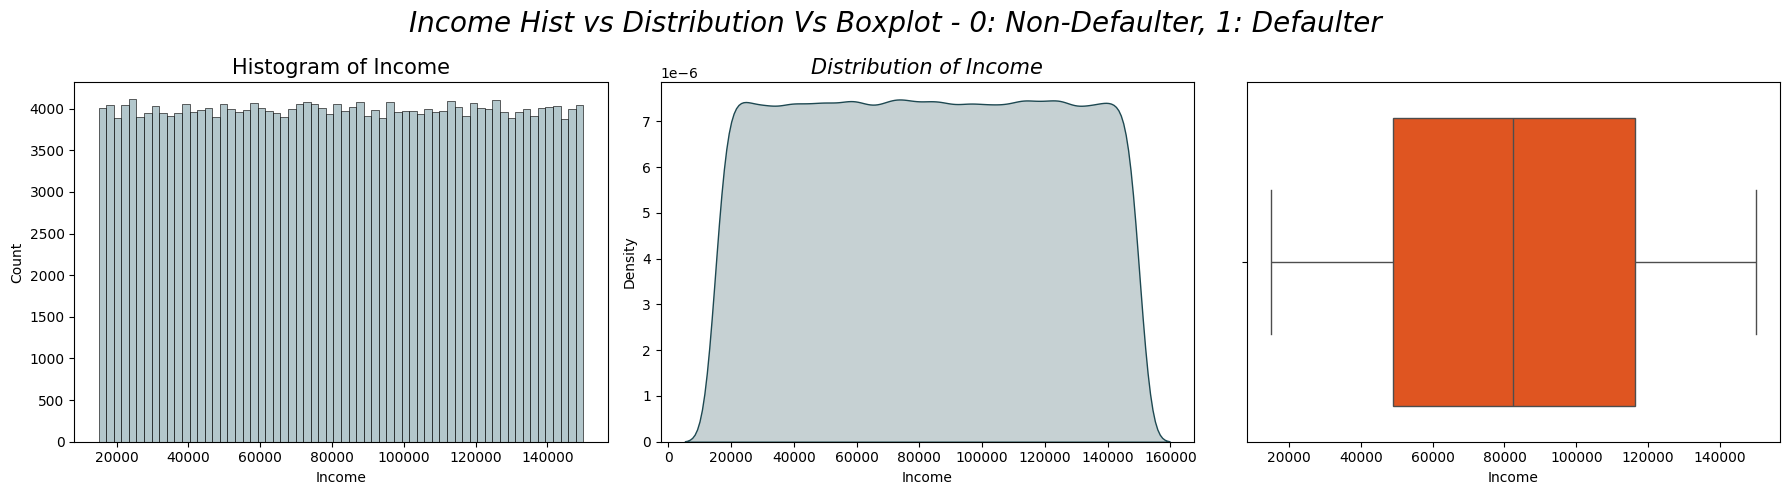

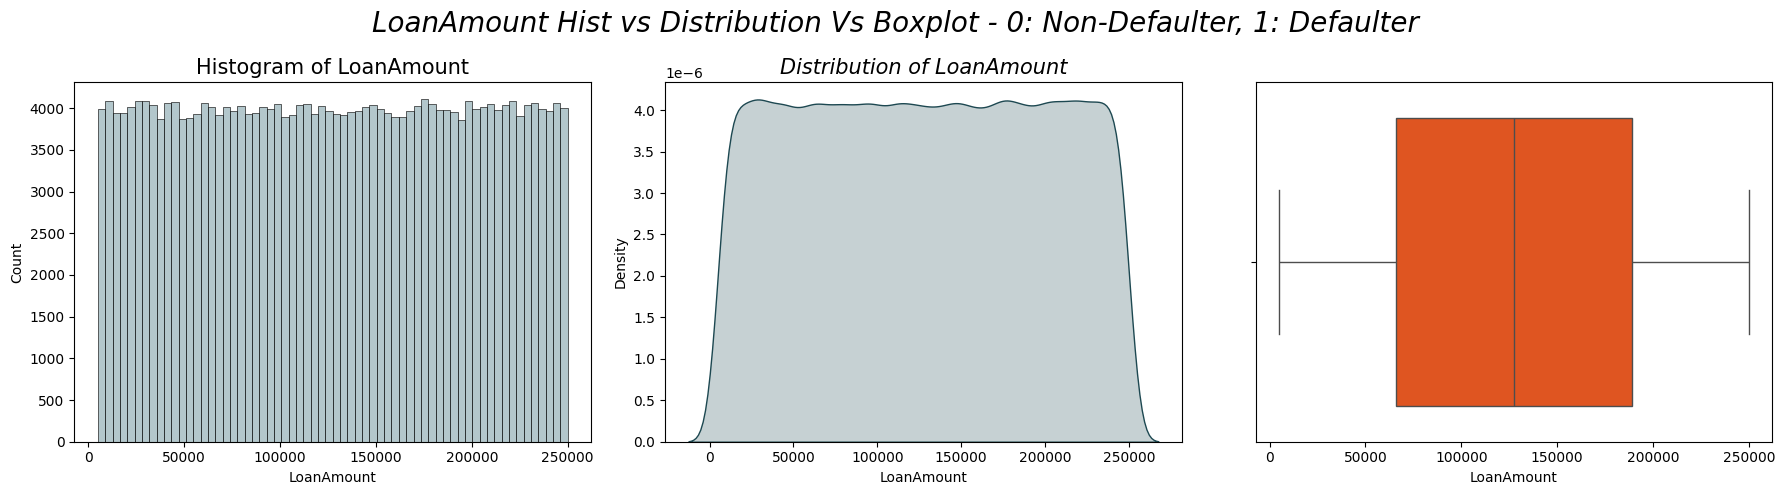

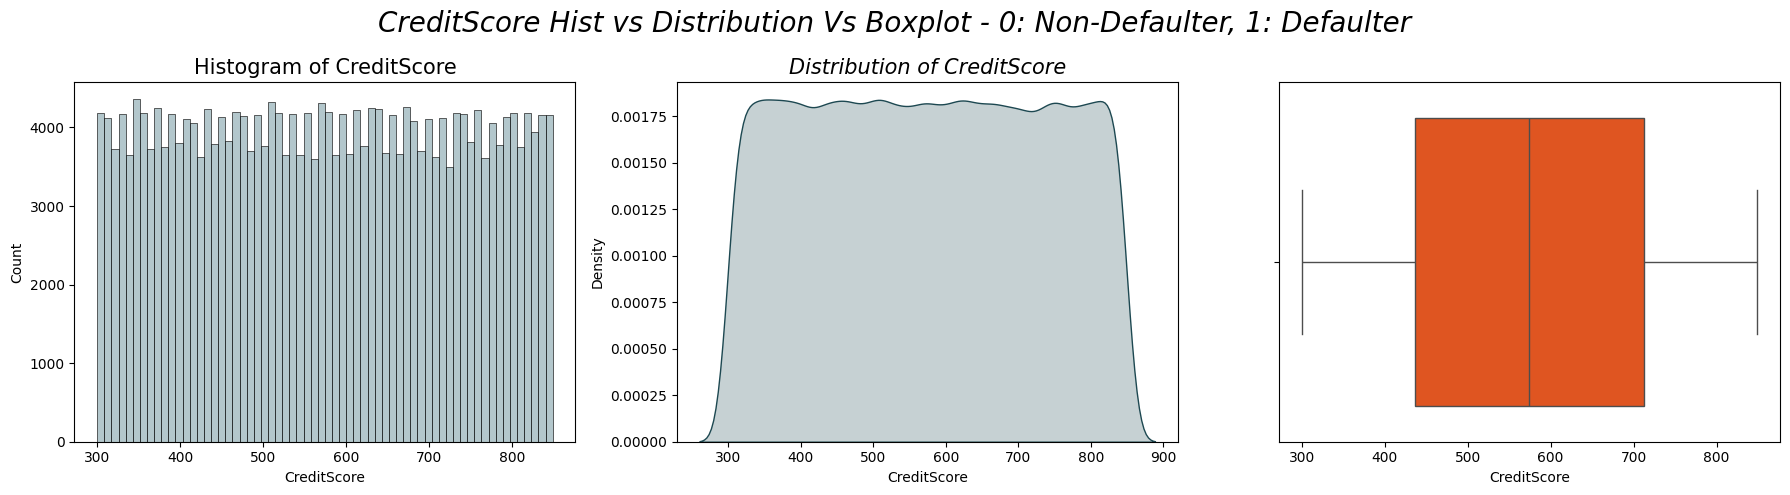

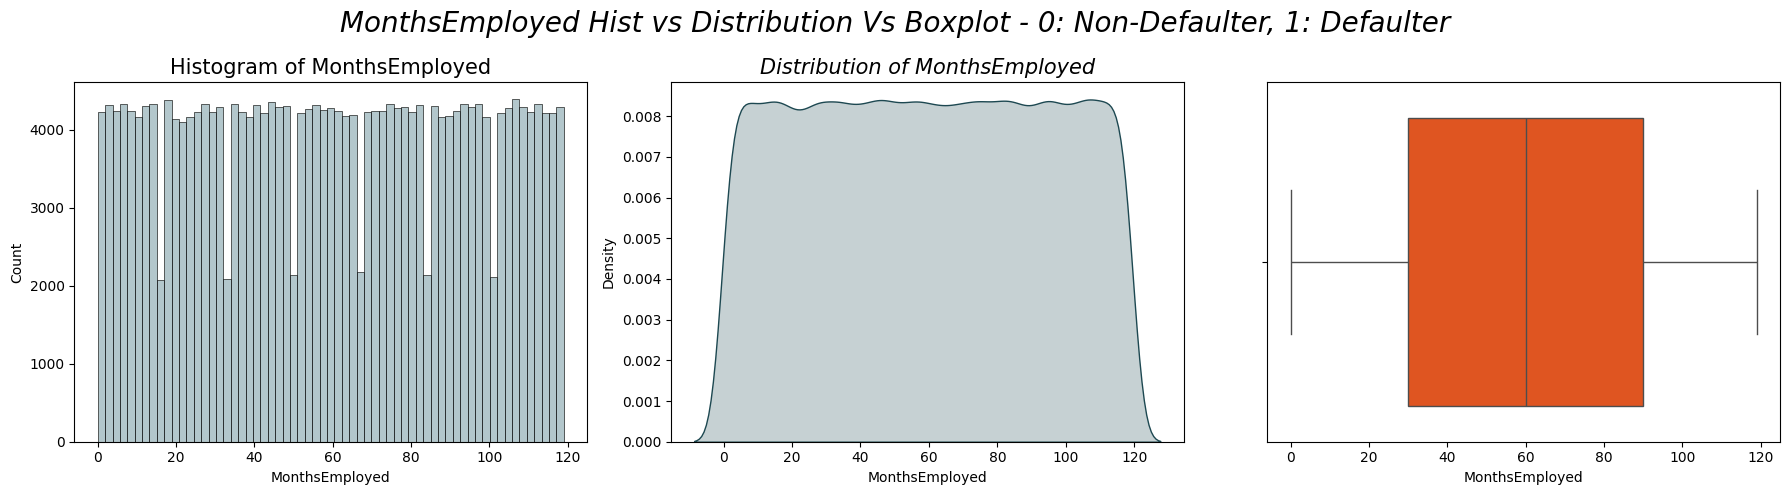

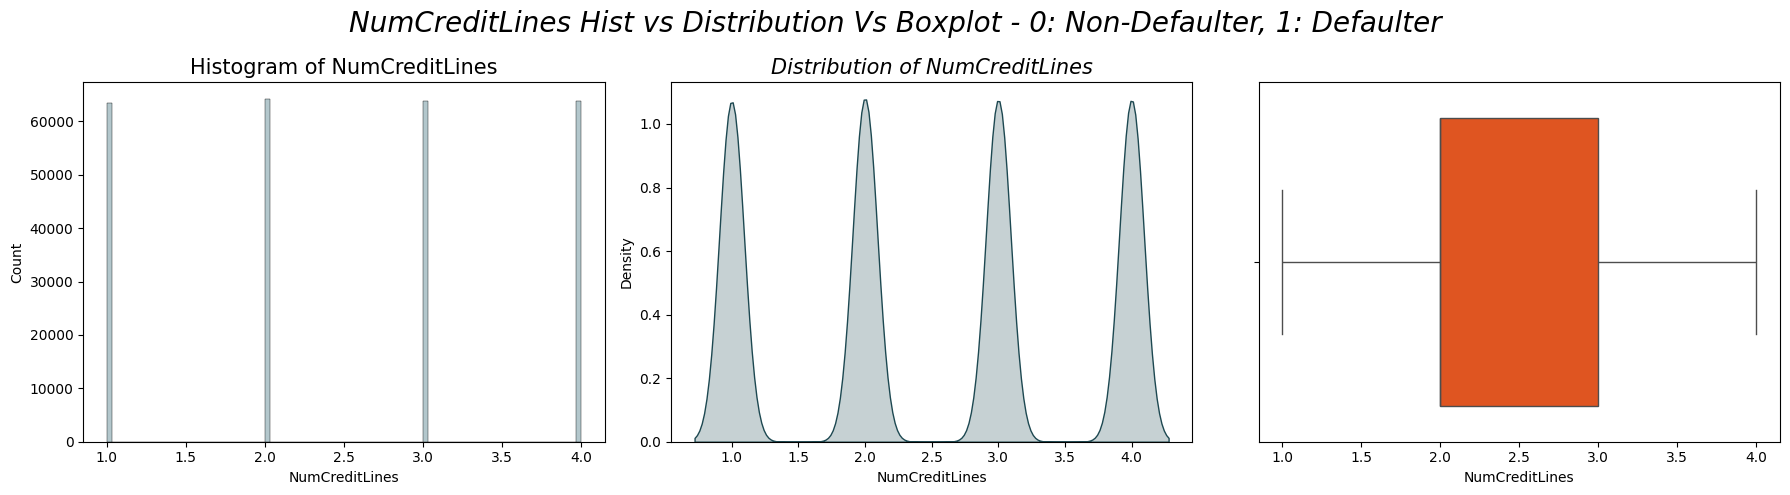

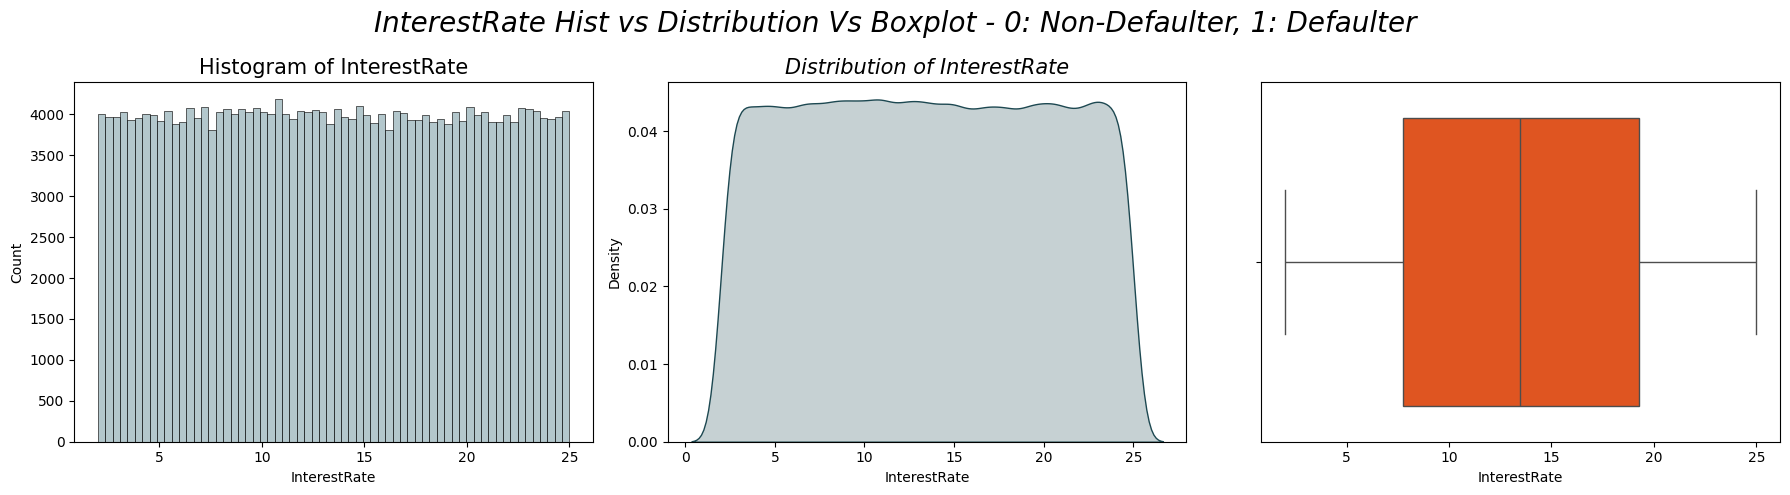

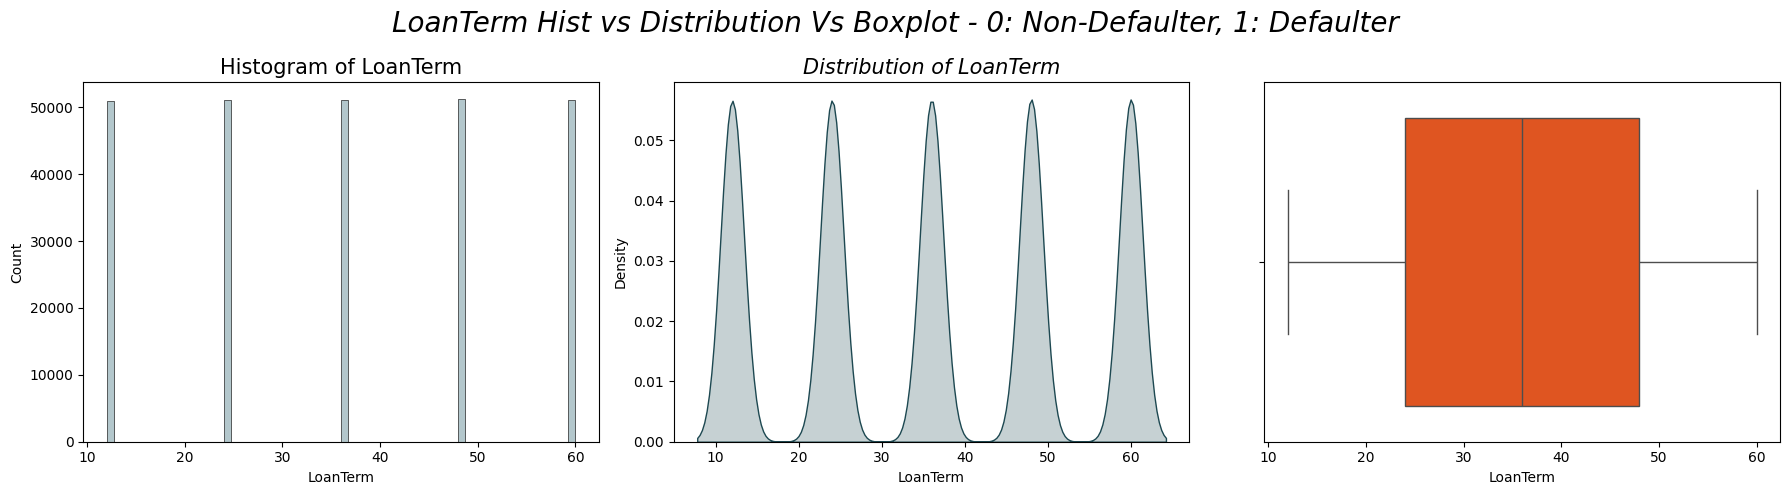

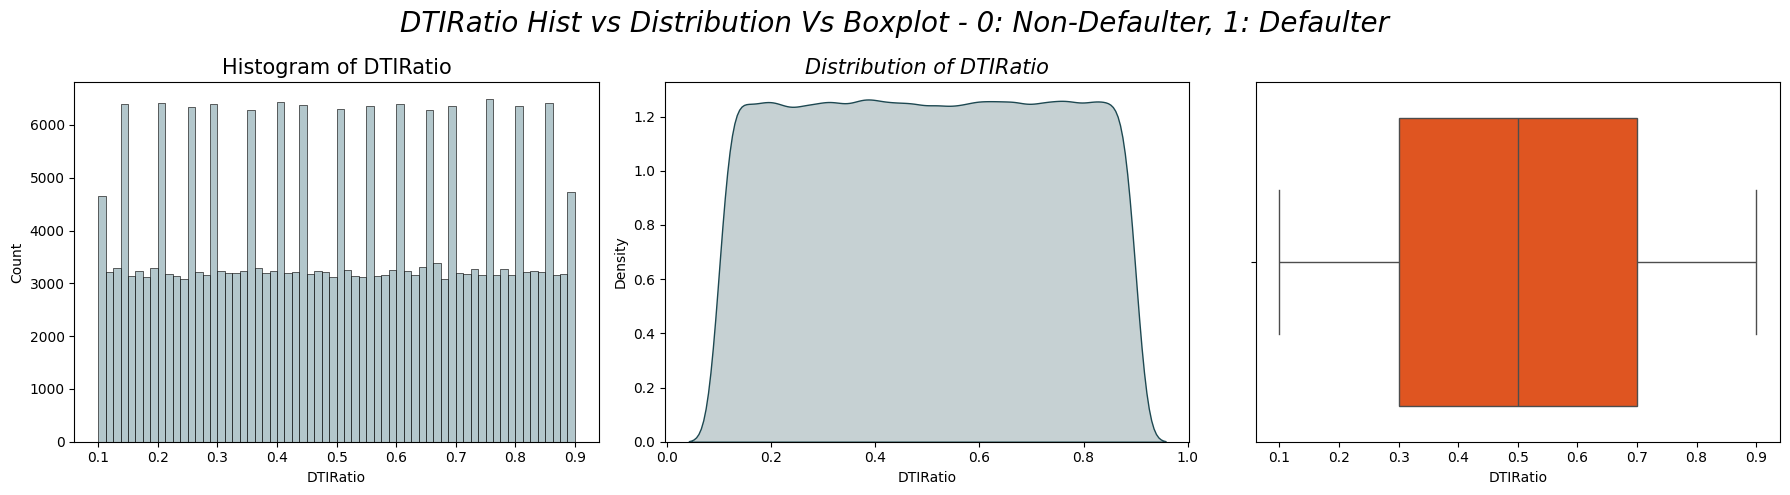

In [101]:
for col in numerical[:-1]:
    plot_data(col, colors_1)

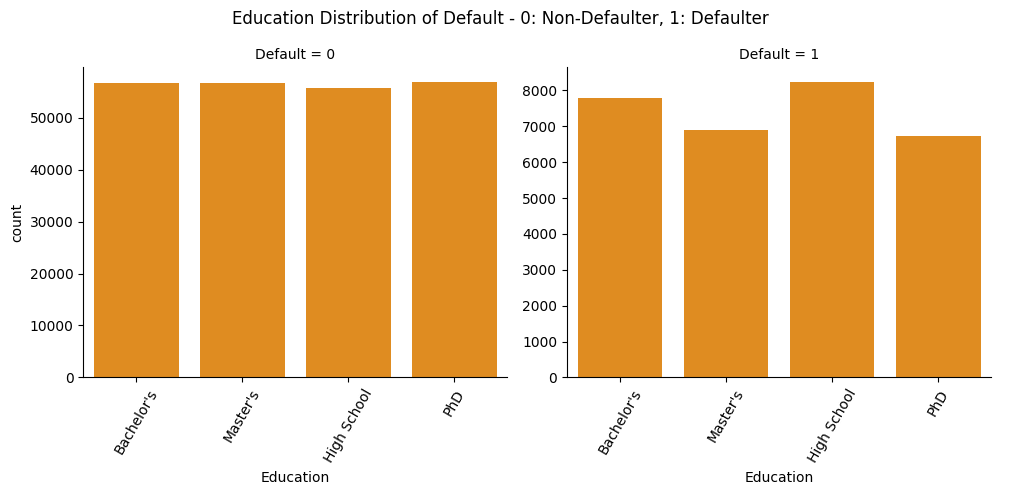

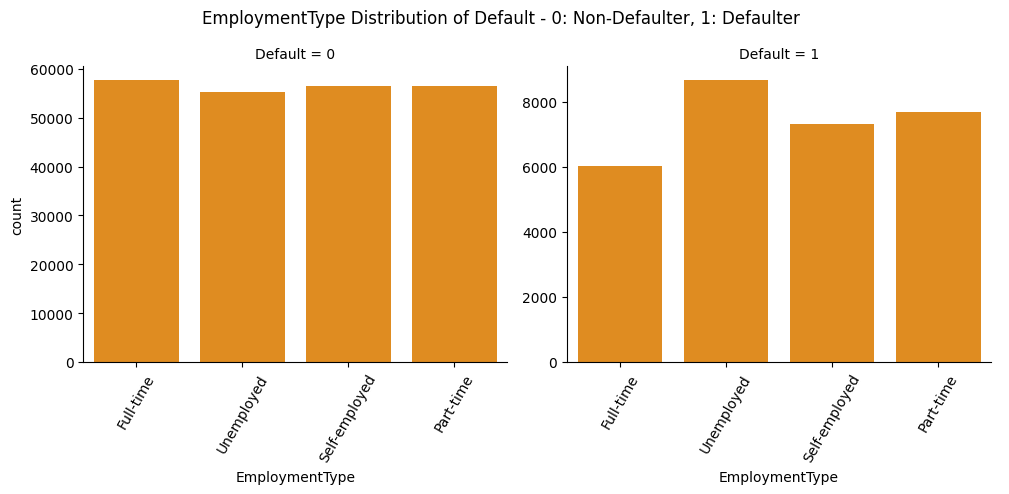

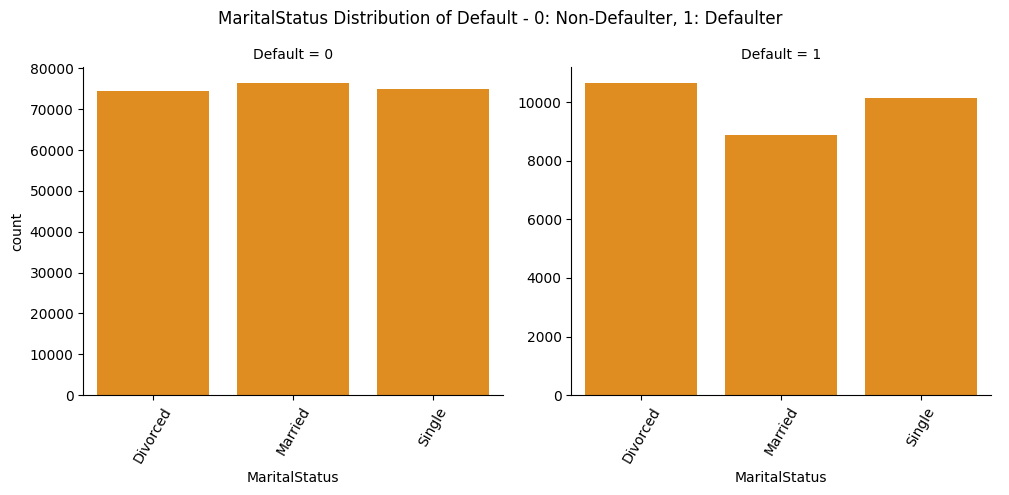

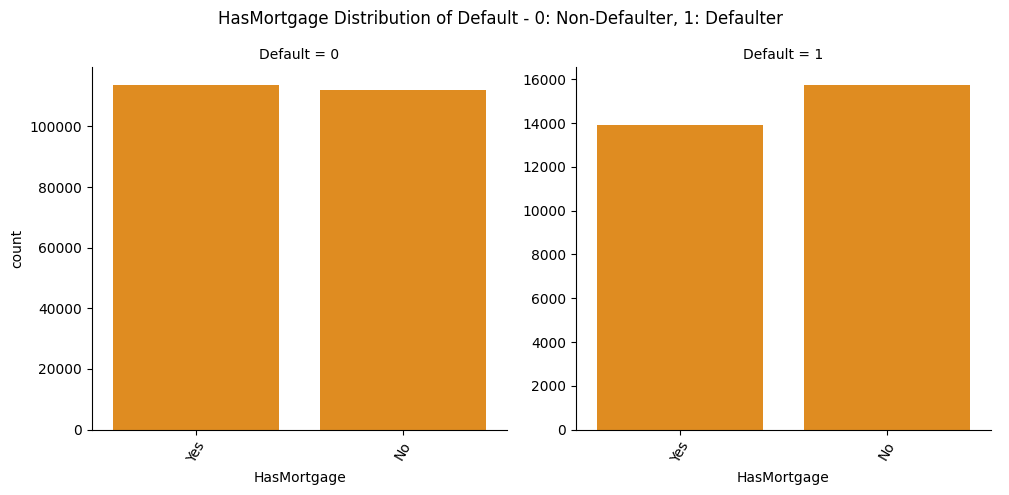

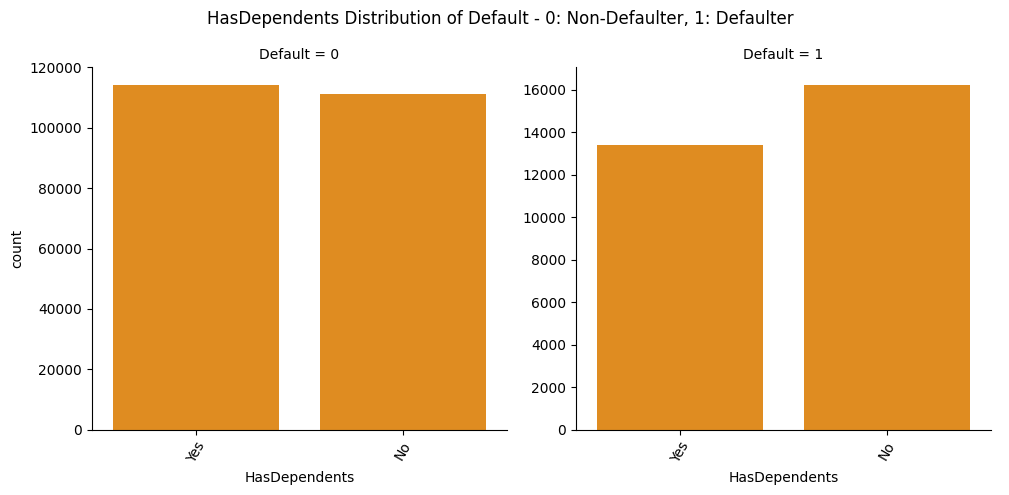

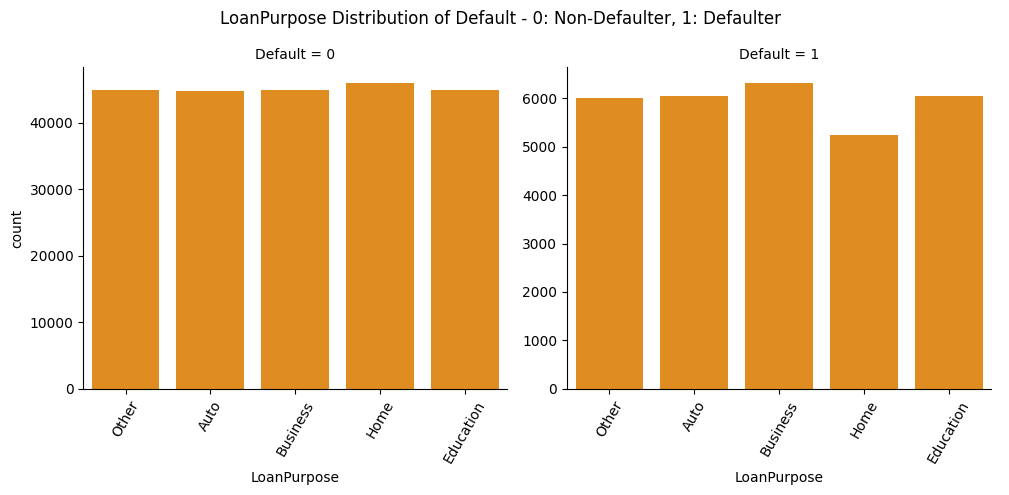

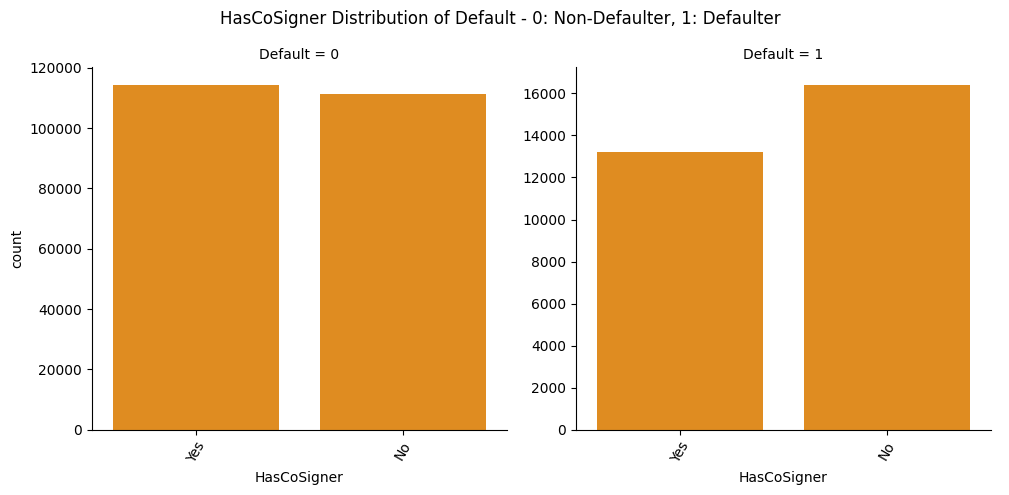

In [ ]:
for col in categorical:
    g = sns.catplot(x=col, col='Default', kind='count', data=df, sharey=False, color=colors_1[2])
    plt.suptitle(f"{col} Distribution of Default - 0: Non-Defaulter, 1: Defaulter")
    g.set_xticklabels(rotation=60)
    plt.tight_layout()
    plt.savefig(f"{eda_path}/ {col} Distribution of Default.pdf")
    plt.show()

## Percentage of Defaulters vs Non-Defaulters
#### The target variable is highly imbalanced, with a large majority of non-defaulters, which requires special handling during model training to avoid biased predictions.

To balance Default class, techniques such as class weighting, oversampling (SMOTE), or undersampling.

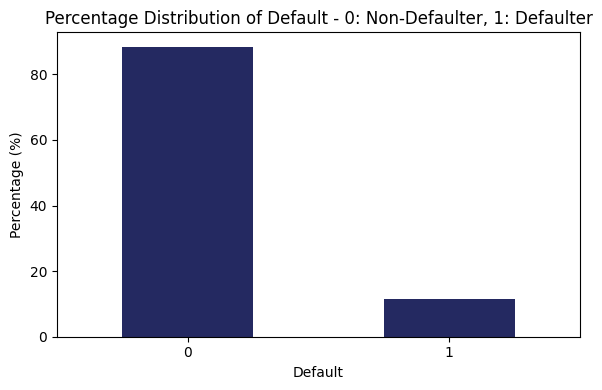

In [ ]:
default_pct = df['Default'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
default_pct.plot(kind='bar', color=colors_3[2])
plt.title("Percentage Distribution of Default - 0: Non-Defaulter, 1: Defaulter")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(f"{eda_path}/Percentage Distribution of Default.pdf")
plt.show()


## Default vs Age (Boxplot)
#### The boxplot indicates that defaulters are generally younger than non-defaulters, suggesting age is a relevant but not standalone predictor of loan default.

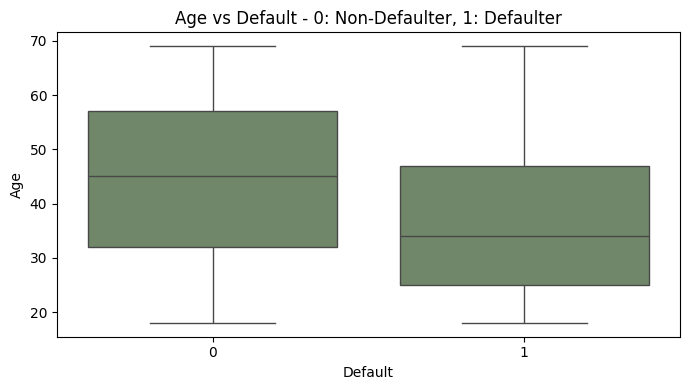

In [98]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Default', y='Age', data=df, color=colors_2[1])
plt.title("Age vs Default - 0: Non-Defaulter, 1: Defaulter")
plt.xlabel("Default")
plt.ylabel("Age")
plt.tight_layout()
plt.savefig(f"{eda_path}/Age vs Default.pdf")
plt.show()

## Default vs Income
#### The boxplot shows that defaulters generally have lower incomes than non-defaulters, making income a significant but not exclusive predictor of loan default.

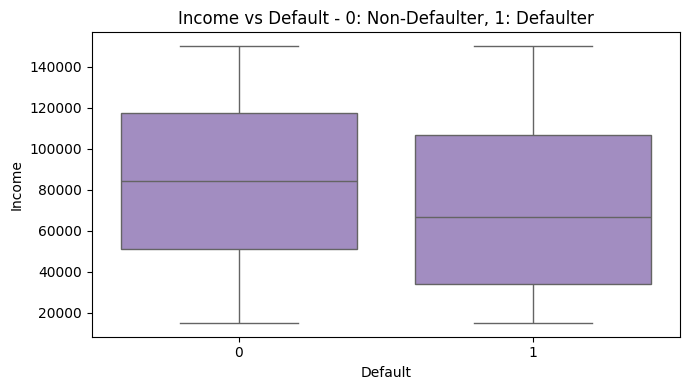

In [96]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Default', y='Income', data=df, color=colors_4[1])
plt.title("Income vs Default - 0: Non-Defaulter, 1: Defaulter")
plt.xlabel("Default")
plt.ylabel("Income")
plt.tight_layout()
plt.savefig(f"{eda_path}/Income Level vs Default.pdf")
plt.show()


##  Default vs Education (Categorical Analysis)
#### The chart indicates that default risk decreases as education level increases, with high school–educated customers showing comparatively higher default rates.

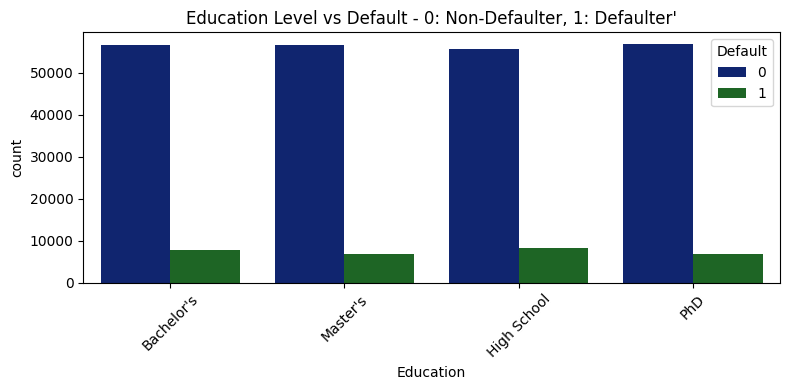

In [97]:
plt.figure(figsize=(8,4))
sns.countplot(x='Education', hue='Default', data=df, palette=random.choice(random_clr))
plt.title("Education Level vs Default - 0: Non-Defaulter, 1: Defaulter'")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{eda_path}/Education Level vs Default.pdf")
plt.show()


## Default vs EmploymentType
#### The chart shows that unemployed and non-full-time workers are more likely to default, highlighting employment stability as a key factor in credit risk assessment.

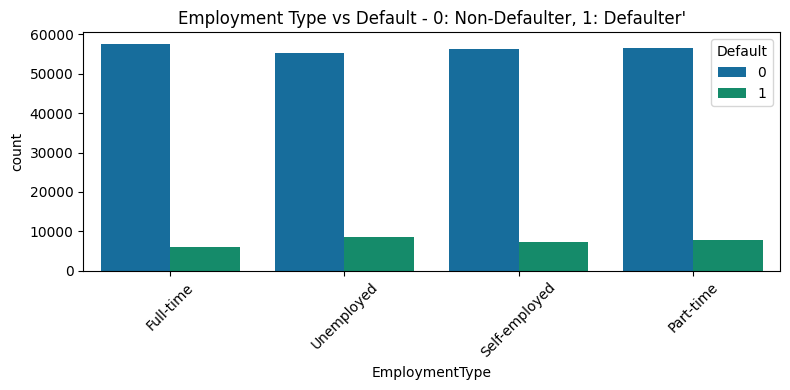

In [100]:
plt.figure(figsize=(8,4))
sns.countplot(x='EmploymentType', hue='Default', data=df, palette=random.choice(random_clr))
plt.title("Employment Type vs Default - 0: Non-Defaulter, 1: Defaulter'")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{eda_path}/Employment Type vs Default.pdf")
plt.show()


## Default vs DTI Ratio (Very Important)
#### Defaulters tend to have slightly higher debt-to-income ratios, indicating that increased financial burden raises default risk.

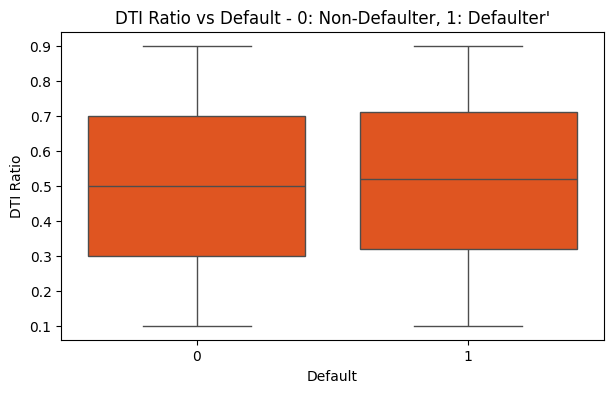

In [93]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Default', y='DTIRatio', color=colors_1[3], data=df)
plt.title("DTI Ratio vs Default - 0: Non-Defaulter, 1: Defaulter'")
plt.xlabel("Default")
plt.ylabel("DTI Ratio")
plt.tight_layout
plt.savefig(f"{eda_path}/DTI Ratio vs Default.pdf")
plt.show()


## Correlation with Target (Numeric Only)
##### This correlation chart shows that older, higher-income, and longer-employed customers are less likely to default, while higher interest rates and larger loan amounts slightly increase default risk. Overall, no single feature strongly predicts default, so multiple factors together are needed to assess risk accurately.

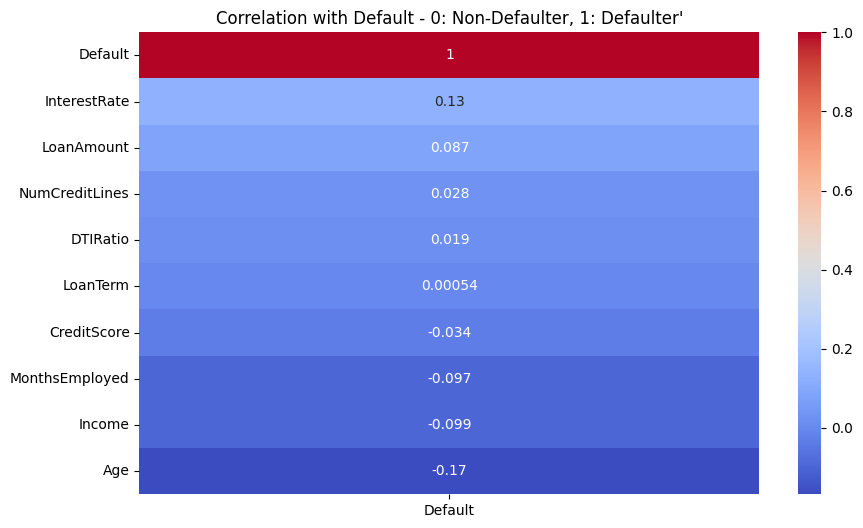

In [94]:

plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=['int64','float64']).corr()

sns.heatmap(corr[['Default']].sort_values(by='Default', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlation with Default - 0: Non-Defaulter, 1: Defaulter'")
plt.tight_layout
plt.savefig(f"{eda_path}/Correlation with Target Variable - Default.pdf")
plt.show()

## KDE Plot on Loan Defaulters
##### These KDE plots compare defaulters and non-defaulters across key features. Defaulters are generally younger, earn less, have shorter employment history, higher interest rates, and higher DTI ratios. However, distributions overlap, meaning no single feature alone predicts default; combined patterns matter for risk assessment.

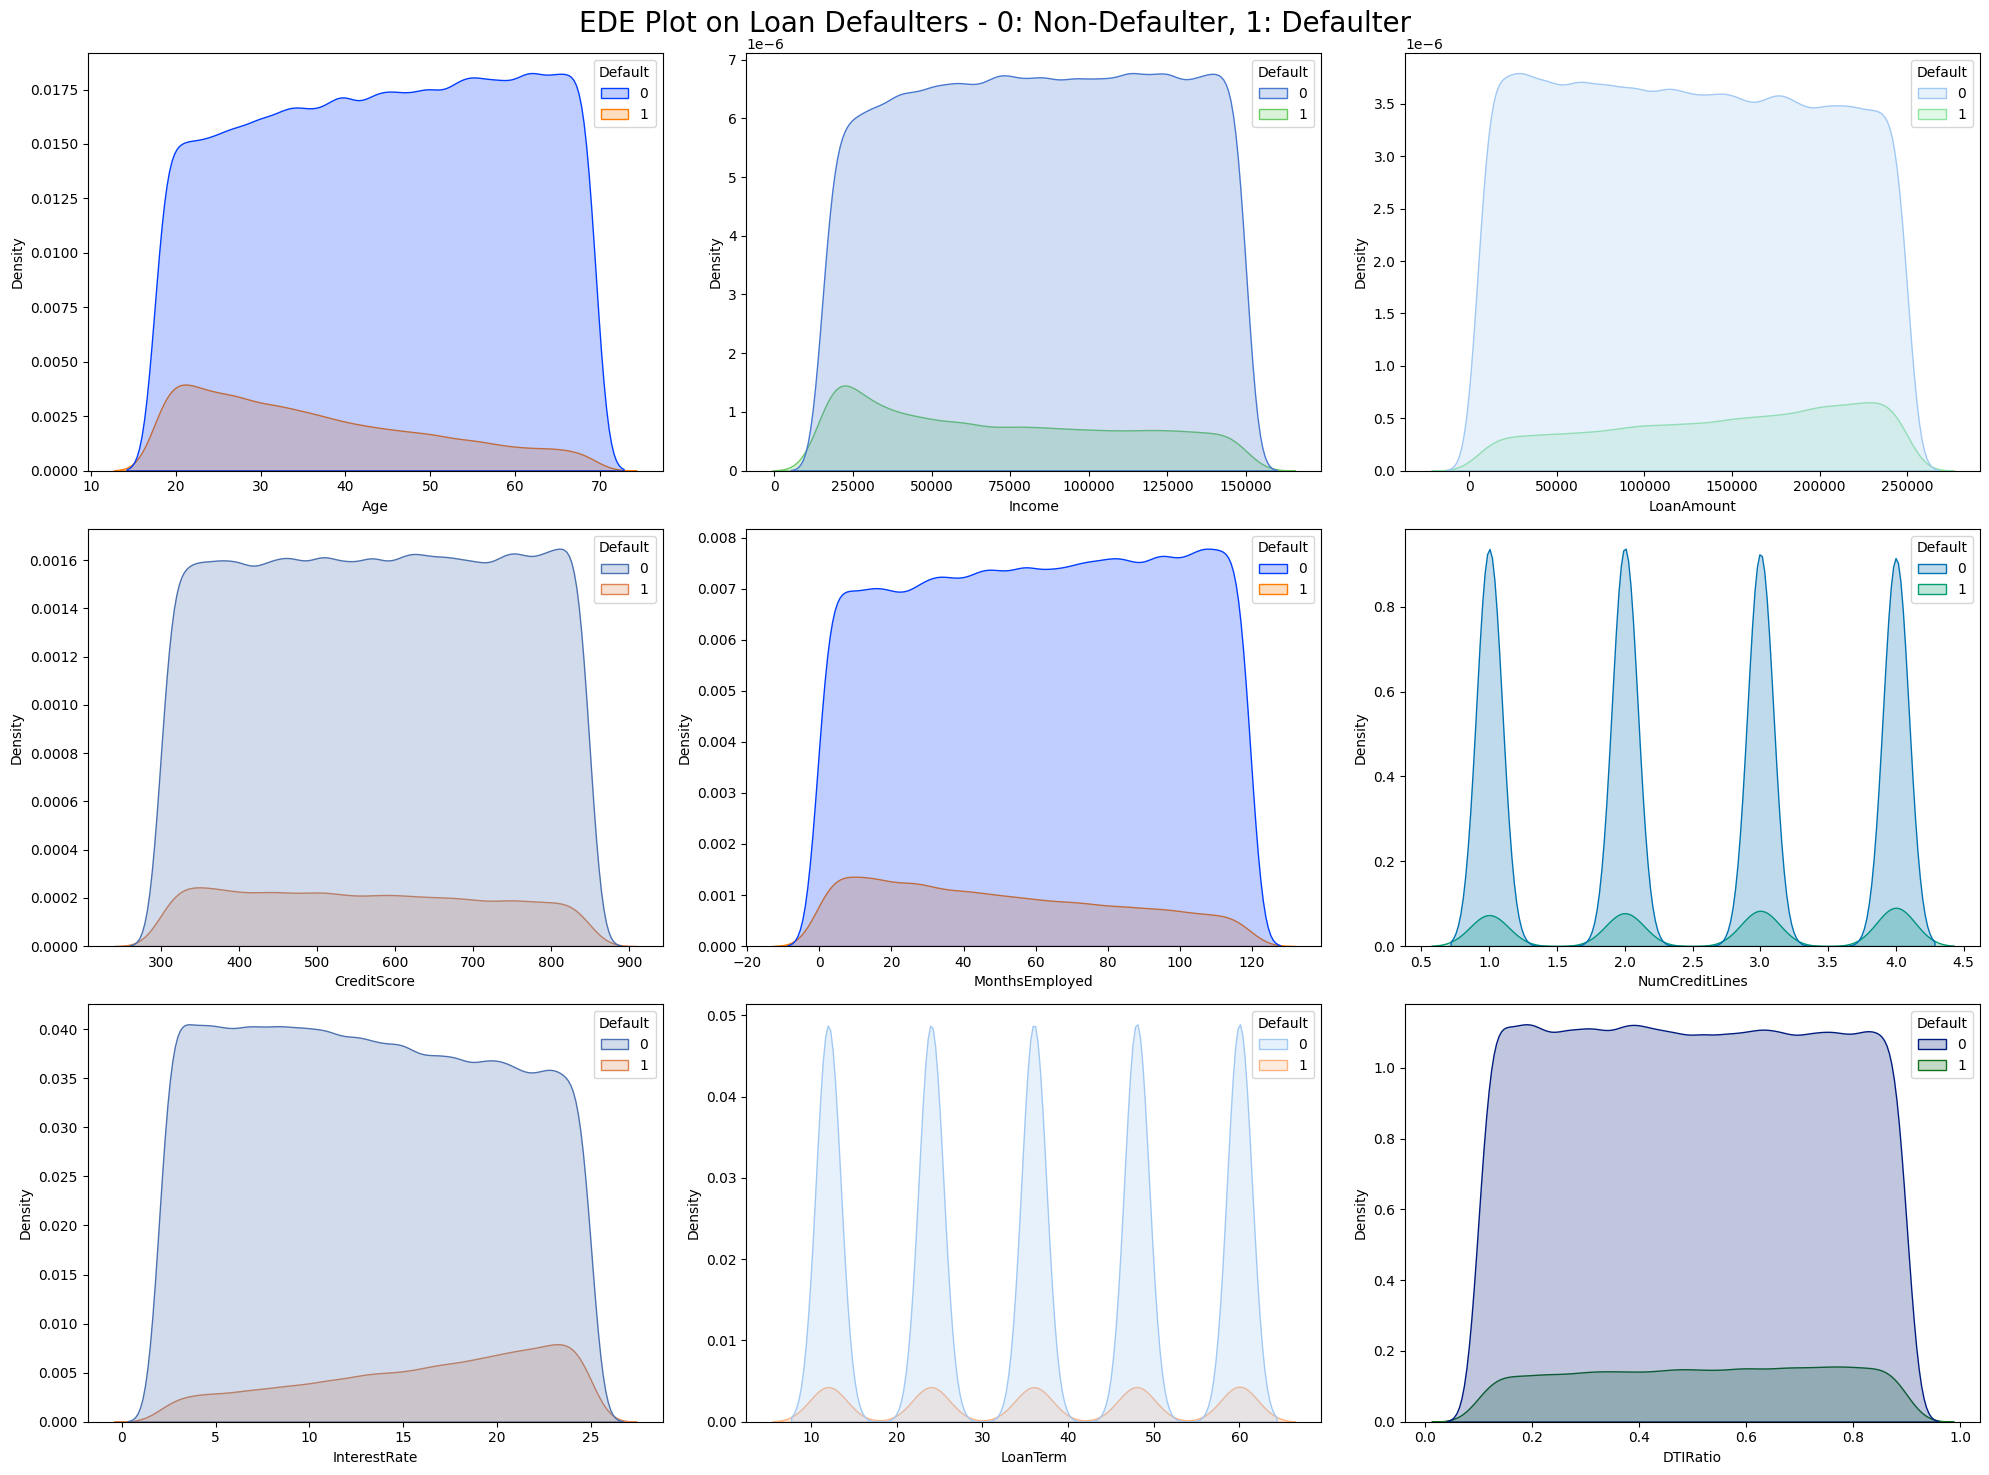

In [95]:
num_cols = numerical[:-1]
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(20, 5 * n_rows))

i = 1
for col in num_cols:
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(data=df, x=col, hue='Default', hue_order=[0, 1], fill=True, palette=random.choice(random_clr))
    plt.xlabel(col)
    plt.ylabel("Density")
    i += 1

plt.suptitle('EDE Plot on Loan Defaulters - 0: Non-Defaulter, 1: Defaulter', fontsize=20)
plt.tight_layout()
plt.savefig(f"{eda_path}/EDA_Plot_on_Numerical_Data.pdf")
plt.show()  

# Machine Learning Integration for Credit Risk Prediction

In [103]:
y = df['Default']

In [104]:
X = df.drop(columns=[
    'Default',
    'AgeGroup'   # EDA-only feature
])

In [169]:
# pd.get_dummies() is used to convert categorical (text) data into numerical form so that machine learning models can understand it.
X = pd.get_dummies(X, drop_first=True)

## Train Test Split
##### train_test_split() is used to split your dataset into training and testing sets so you can train a model and evaluate its performance on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## StandardScaler
##### StandardScaler is used to scale numerical features so they have the same range, making models learn faster and more accurately.


In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression
##### Logistic Regression is a supervised machine learning algorithm used for binary classification using a logistic (sigmoid) function, where the output is 0 or 1 (e.g., Non-Defaulter vs Defaulter).
- It calculates a linear combination of input features
- Applies the sigmoid function to convert the result into a probability (0–1)
- Uses a threshold (usually 0.5) to classify the output

In [108]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

## RandomForestClassifier
##### Random Forest is an ensemble learning method that creates multiple decision trees using random samples of data and features, and predicts the final class using majority voting.

![alt text](vz1f8191.Ensemble-of-decision-trees.png)

In [109]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [110]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

In [111]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.69      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.79      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070

ROC-AUC Score: 0.7391818910106078


##### The ROC curve shows how well your model distinguishes between defaulters and non-defaulters at different classification thresholds.
Key Points: <br>
- The blue curve represents your model’s performance.
- The dashed diagonal line represents random guessing.
- Your model’s AUC = 0.74, which means it has a 74% chance of correctly ranking a defaulter higher than a non-defaulter.<br>

Interpretation: <br>
- Since the curve is well above the diagonal, your model performs better than random.
- An AUC of 0.74 indicates good discriminatory power, suitable for credit risk prediction.

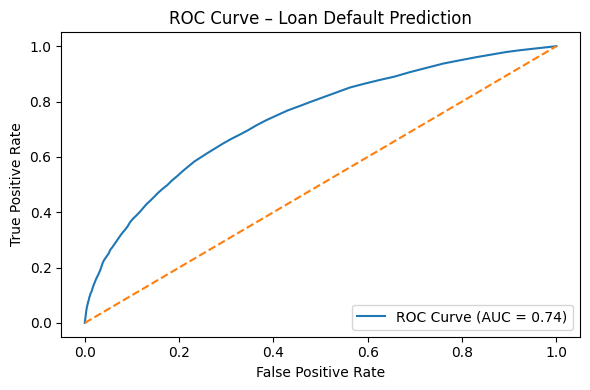

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Loan Default Prediction')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(f"{eda_path}/ROC Curve – Loan Default Prediction.pdf")
plt.show()

## Feature Importance in Credit Risk Prediction
- Income is the most important feature, meaning repayment ability strongly affects default risk.
- Interest Rate and Loan Amount are next, showing higher financial burden increases risk.
- Age, Credit Score, and Months Employed also play a major role, reflecting borrower stability.
- DTI Ratio has moderate importance, supporting its role as a financial stress indicator. 
- Categorical features like education, marital status, and loan purpose have lower impact individually.

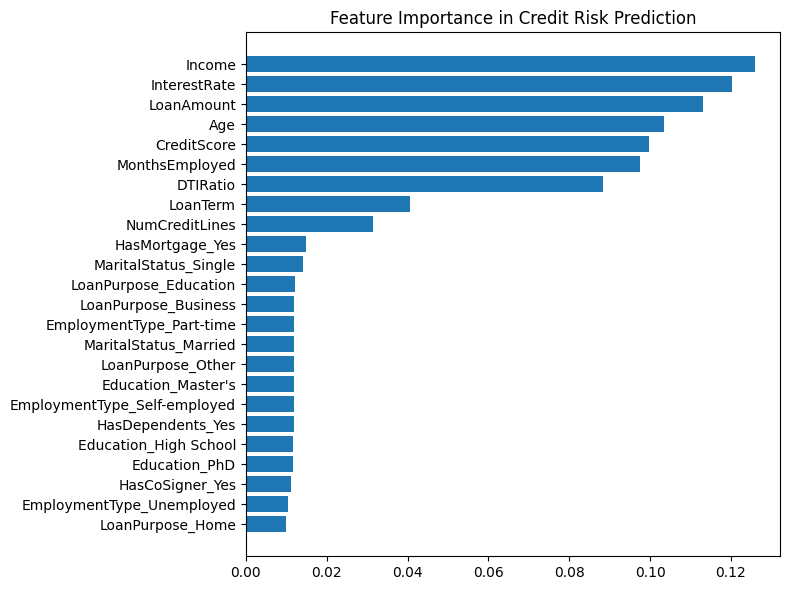

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.title("Feature Importance in Credit Risk Prediction")
plt.tight_layout()
plt.savefig(f"{eda_path}/Feature Importance in Credit Risk Prediction.pdf")
plt.show()

In [172]:
df_test = X.iloc[y_test.index].copy()
df_test['Default_Probability'] = y_prob

df_test['Risk_Category'] = pd.cut(
    df_test['Default_Probability'],
    bins=[0, 0.3, 0.6, 1],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

RESULT 1: Model Performance Metrics  show:
	•	Classification Report
	•	ROC-AUC Score

In [116]:
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.69      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.79      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070

ROC-AUC: 0.7391818910106078


## Confusion Matrix – Loan Default Prediction
##### This confusion matrix shows how well your model predicts loan default.
What the numbers mean: <br>
- 45,092 → Correctly predicted No Default (True Negatives)
- 170 → Correctly predicted Default (True Positives)
- 78 → Non-defaulters wrongly predicted as defaulters (False Positives)
- 5,730 → Defaulters wrongly predicted as non-defaulters (False Negatives)

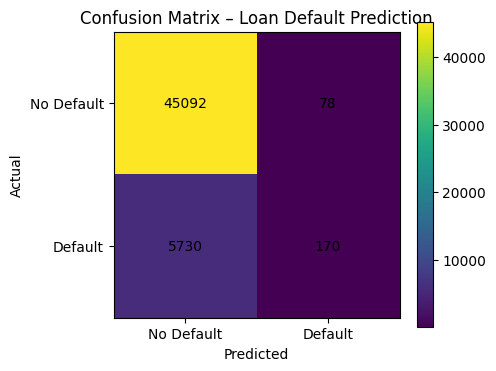

In [167]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm)
plt.title('Confusion Matrix – Loan Default Prediction')
plt.colorbar()
plt.xticks([0,1], ['No Default', 'Default'])
plt.yticks([0,1], ['No Default', 'Default'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig(f"{eda_path}/Confusion Matrix – Loan Default Prediction 2.pdf")
plt.show()

RESULT 2: Confusion Matrix (Decision Proof). Why this matters to banks

It shows:
	•	How many actual defaulters were caught
	•	How many safe customers were correctly approved

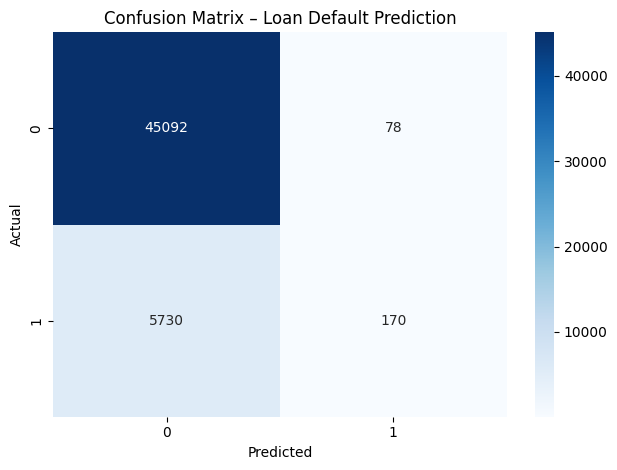

In [149]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Loan Default Prediction")
plt.tight_layout()
plt.savefig(f"{eda_path}/Confusion Matrix – Loan Default Prediction.pdf")
plt.show()

RESULT 3: Default Probability Output (REAL BANK VALUE) Why this is powerful Banks don’t want just Yes/No — they want risk level.

In [150]:
results = pd.DataFrame({
    'Actual_Default': y_test.values,
    'Predicted_Default': y_pred,
    'Default_Probability': y_prob
})

results.head(10)

,Actual_Default,Predicted_Default,Default_Probability
0,0,0,0.030
1,0,0,0.035
2,0,0,0.105
3,0,0,0.170
4,0,0,0.155
5,0,0,0.155
6,0,0,0.075
7,0,0,0.055
8,0,0,0.045
9,0,0,0.140


## Actual vs Predicted Loan Default Comparison
- 0 vs 0 (Actual No Default, Predicted No Default) is the largest bar, meaning the model correctly predicts most non-defaulters.
- 1 vs 0 (Actual Default, Predicted No Default) is also large, showing the model misses many defaulters.
- 1 vs 1 (Correctly predicted defaults) is very small.
- 0 vs 1 (False alarms) is minimal.

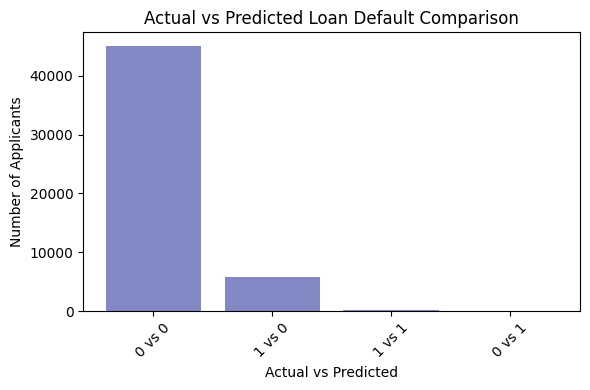

In [166]:
comparison = results[['Actual_Default', 'Predicted_Default']].value_counts().reset_index()
comparison.columns = ['Actual_Default', 'Predicted_Default', 'Count']

plt.figure(figsize=(6,4))
plt.bar(
    comparison.index,
    comparison['Count'], color = colors_3[1]
)
plt.xticks(
    comparison.index,
    comparison[['Actual_Default','Predicted_Default']].astype(str).agg(' vs '.join, axis=1),
    rotation=45
)
plt.title('Actual vs Predicted Loan Default Comparison')
plt.ylabel('Number of Applicants')
plt.xlabel('Actual vs Predicted')
plt.tight_layout()
plt.savefig(f"{eda_path}/Actual vs Predicted Loan Default Comparison.pdf")
plt.show()

RESULT 4: Risk Categorization (ACTIONABLE RESULT). Why this proves business usefulness? <br>
Now the bank can:<br>
	•	Auto-approve low risk <br>
	•	Manually review medium risk <br>
	•	Reject or price high risk <br>

In [153]:
results['Risk_Category'] = pd.cut(
    results['Default_Probability'],
    bins=[0, 0.3, 0.6, 1],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

results['Risk_Category'].value_counts()

Risk_Category
Low Risk       47804
Medium Risk     3161
High Risk         46
Name: count, dtype: int64

## Distribution of Predicted Credit Risk Categories
#### The model classifies most applicants as low risk, with very few high-risk predictions, suggesting conservative risk assessment influenced by data imbalance.

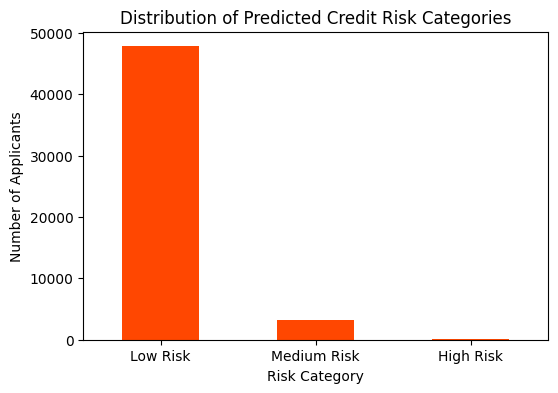

In [157]:
risk_counts = results['Risk_Category'].value_counts()
plt.figure(figsize=(6,4))
risk_counts.plot(kind='bar', color= colors_1[3])
plt.title('Distribution of Predicted Credit Risk Categories')
plt.xlabel('Risk Category')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.show()

## Final Conclusion: Credit Risk Prediction Using Machine Learning

This project demonstrates how machine learning can effectively predict credit risk and reduce loan default rates using customer financial, and loan-related data.

Exploratory Data Analysis revealed that the dataset is highly imbalanced, with far fewer defaulters than non-defaulters. Key factors influencing default risk include income, interest rate, loan amount, age, credit score, employment stability, and debt-to-income ratio. Younger applicants, lower-income groups, higher interest rates, and higher DTI ratios showed a greater tendency to default.

A Random Forest Classifier was implemented due to its ability to handle non-linear relationships, feature interactions, and class imbalance. The model achieved a ROC-AUC score of 0.74, indicating good discriminatory power. Feature importance analysis confirmed that financial capacity and loan burden are stronger predictors of default than demographic attributes.

Although the model performs very well in identifying non-defaulters, it struggles to detect defaulters due to class imbalance. This highlights the importance of using recall, ROC-AUC, and risk-based thresholds instead of accuracy alone in credit risk modeling.

Overall, this project shows that data-driven credit risk prediction can support smarter lending decisions, minimize financial losses, and improve portfolio quality when combined with proper threshold tuning and risk segmentation.